# Assignment 3
# Part I: Windows-based stereo

In [35]:
%matplotlib inline

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.colors import LogNorm
from skimage import img_as_ubyte
from skimage.color import rgb2grey

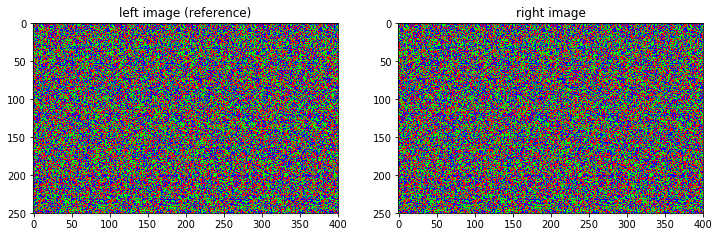

In [37]:
# you should use this random dot stereo pair for code developing/testing in Probelms 1-5
im_left = image.imread("images/stereo_pairs/rds_left.gif")
im_right = image.imread("images/stereo_pairs/rds_right.gif")

fig = plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.title("left image (reference)")
plt.imshow(im_left)
plt.subplot(122)
plt.title("right image")
plt.imshow(im_right)

# the range of disparities for this random dot stereo pair 
d_min = 0
d_max = 2

### Problem 1: compute and visualize (as an image) an array of "squared differences" between RGB pixel values in the left and the right images. Treat each RGB pixel value as 3-vector and interprete "squared difference" as squared L2 norm of the difference between the corresponding vectors. HINT: convert R, G, B values to floats. Note that $imshow$ function can display (as an image) any 2D array of floats.

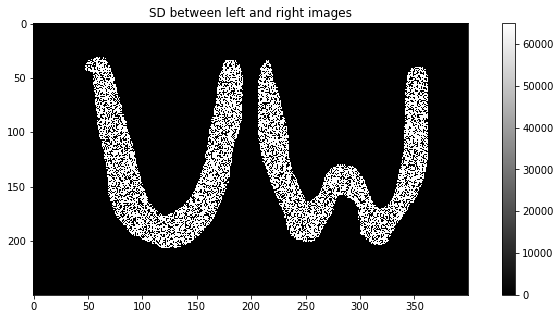

In [38]:
from numpy.linalg import norm

SD = np.zeros((np.shape(im_left)[0],np.shape(im_left)[1])) 

Diff_R = (im_left[:,:,0]-im_right[:,:,0]).flatten()
Diff_G = (im_left[:,:,1]-im_right[:,:,1]).flatten()
Diff_B = (im_left[:,:,2]-im_right[:,:,2]).flatten()
Diff_stacked = np.vstack([Diff_R,Diff_G,Diff_B])

L2 = norm(Diff_stacked,axis=0)
SqrL2 = L2**2
SD = SqrL2.reshape((np.shape(im_left)[0],np.shape(im_left)[1]))

#print(SD)       

fig = plt.figure(figsize = (12, 5))
plt.title("SD between left and right images")
plt.imshow(SD, cmap = "gray")
plt.colorbar()

### Problem 2: write function for computing squared differences between RGB pixel values in the reference (left) image and the "shifted" right image for ALL shifts/disparities $\Delta$ in the range $\Delta\in [d_{min},d_{max}]$. You should think about the correct direction of the shift. The output should be array $SD$ such that $SD[i]$ is an image of Squared Differences for shift $\Delta = d_{min} + i$ for any $i\in [0,d_{max}-d_{min}]$. 

In [39]:
def SD_array(imageL, imageR, d_minimum, d_maximum):
    # initialization of the array of "squared differences" for different shifts
    SD = np.zeros((1+d_maximum-d_minimum,np.shape(imageL)[0],np.shape(imageL)[1]))
    
    # for each d from dmin to dmax
    for k in range(1+d_maximum-d_minimum):
        # the current disparity with the shift
        delta = d_minimum + k
        
        # find the squared differences for the given disparities
        CSD = np.zeros((np.shape(imageL)[0],np.shape(imageR)[1]))
        
        
        LR = imageL[:,:,0]
        LG = imageL[:,:,1]
        LB = imageL[:,:,2]
        RR = imageR[:,:,0]
        RG = imageR[:,:,1]
        RB = imageR[:,:,2]
        RR = np.roll(RR,delta,axis=1)
        RG = np.roll(RG,delta,axis=1)
        RB = np.roll(RB,delta,axis=1)
        Diff_R = (LR-RR).flatten()
        Diff_G = (LG-RG).flatten()
        Diff_B = (LB-RB).flatten()
        Diff_stacked = np.vstack([Diff_R,Diff_G,Diff_B])

        L2 = norm(Diff_stacked,axis=0)
        SqrL2 = L2**2
        CSD = SqrL2.reshape((np.shape(imageL)[0],np.shape(imageR)[1]))
        
        # Update the array of "square differences" for the current shift
        SD[k] = CSD
        
    return SD

### Use $\text{SD_array}$ function to compute SD images for the random dot stereo pair. Visualize such squared difference images for $\Delta=d_{min}$, $\Delta = d_{mid}\approx\frac{d_{min}+d_{max}}{2}$, and $\Delta=d_{max}$. Note that the first image should be identical to the one in Problem 1. (fully implemented)

(250, 400, 4)
(250, 400, 4)
(3, 250, 400)


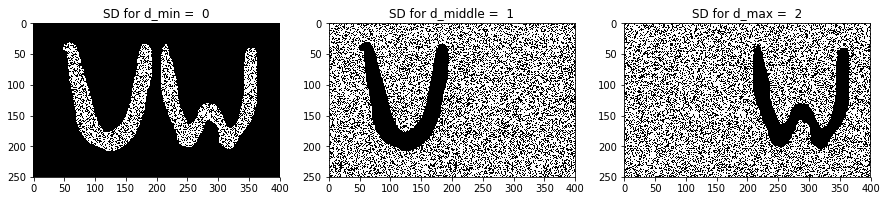

In [40]:
#A = np.array([[[1,2,3],[4,5,6],[7,8,9],[3,6,4]],
#              [[4,5,6],[4,3,2],[6,7,9],[3,3,2]],
#              [[4,4,4],[5,8,1],[2,7,0],[3,2,1]]])
#print(np.roll(A,2,axis=1))

SD = SD_array(im_left, im_right, d_min, d_max)    
print(np.shape(im_left))
print(np.shape(im_right))
print(np.shape(SD))

fig = plt.figure(figsize = (15, 4))
plt.subplot(131)
plt.title('SD for d_min = {:>2d}'.format(d_min))
plt.imshow(SD[0], cmap = "gray")
plt.subplot(132) 
d_middle = round((d_min+d_max)/2)
plt.title('SD for d_middle = {:>2d}'.format(d_middle))
plt.imshow(SD[d_middle-d_min], cmap = "gray")
plt.subplot(133)
plt.title('SD for d_max = {:>2d}'.format(d_max))
plt.imshow(SD[d_max-d_min], cmap = "gray")
#plt.colorbar(cax=plt.axes([0.91, 0.25, 0.01, 0.5]))

### Problem 3: write function to compute an "integral image" for any given "scalar" image

In [41]:
# Function integral_image can be applied to any scalar 2D array/image. 
# This function should return a double/float64 (precision) array/image of the same size.
# NOTE: it is safer to explicitly specify double/float64 precision for integral images since 
# later we will be adding/subtracting ("differenting") their values in nearby pixels .

def integral_image(img):
    # the intergral image to return
    Int_im = np.zeros((img.shape))
    for i in range(img.shape[0]):
        # keep track of the row sum for the current row
        r_sum = 0.0
        for j in range(img.shape[1]):
            # the the current index is (0,0)
            if ((i == 0) and (j == 0)):
                Int_im[i][j] = float(img[i][j])
                r_sum = float(img[i][j])
            elif (i == 0):
                # it is on the first row
                Int_im[i][j] = r_sum + float(img[i][j])
                r_sum = r_sum + float(img[i][j])
            elif (j == 0):
                # it is on the first column
                r_sum = float(img[i][j])
                Int_im[i][j] = Int_im[i-1][j] + r_sum
            else:
                # otherwise
                Int_im[i][j] = Int_im[i-1][j] + r_sum + float(img[i][j])
                r_sum = r_sum + float(img[i][j])
                
    return Int_im

### apply $\text{intergal_image}$ function to the "squared differences" (SD) for each disparity (fully implemented)

(3, 250, 400) (3, 250, 400)


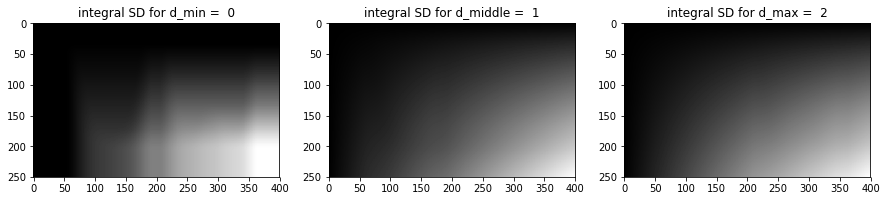

In [42]:
integral_SD = np.zeros(np.shape(SD))
print(np.shape(integral_SD),np.shape(SD))

for Delta in range(1+d_max-d_min):
    integral_SD[Delta] = integral_image(SD[Delta])
        
fig = plt.figure(figsize = (15, 4))
plt.subplot(131)
plt.title('integral SD for d_min = {:>2d}'.format(d_min))
plt.imshow(integral_SD[0], cmap = "gray")
plt.subplot(132) 
d_middle = round((d_min+d_max)/2)
plt.title('integral SD for d_middle = {:>2d}'.format(d_middle))
plt.imshow(integral_SD[d_middle-d_min], cmap = "gray")
plt.subplot(133)
plt.title('integral SD for d_max = {:>2d}'.format(d_max))
plt.imshow(integral_SD[d_max-d_min], cmap = "gray")
#plt.colorbar(cax=plt.axes([0.91, 0.2, 0.01, 0.6]))

### Problem 4: write function that sums the elements of the input image within fixed-size windows around image pixels. Note that this function should work for any (odd or even) values of parameter $\text{window_width}\in\{1,2,3,4,5,...\}$ according to the windows illustration below: <img src="images\windows.png">

In [43]:
# function windSum can be applied to any scalar 2D array/image. It should return an array/image where the value of 
# each element (pixel p) is the "sum" of the values in the input array/image within a window around element p.
# The return image should be of the same size/type and have its margins (around half-window width) filled with INFTY.
# NOTE: you should use function integral_image implemented earlier.
# HINT: you should use standard np.roll function to avoid double or triple for loops.
INFTY = np.inf

from math import floor

def windSum(img, window_width):
    # get the distance from the point to bottom right corner
    m = floor(window_width/2)
    
    if (m != 0) :
        # get the integral map
        int_im = integral_image(img)
        
        # comput the window sum using np.roll
        #print(int_im)
        BL = np.roll(int_im,window_width,axis=1)
        #print(m)
        #print(BL)
        BL[:,(window_width-1):window_width] = 0
        #print(BL)
        UR = np.roll(int_im,window_width,axis=0)
        #print(UR)
        UR[(window_width-1):window_width,:] = 0      
        #print(UR)
        UL = np.roll(np.roll(int_im,window_width,axis=0),window_width,axis=1)
        UL[:,(window_width-1):window_width] = 0
        UL[(window_width-1):window_width,:] = 0
        #print(UL)
        winsum = int_im-BL-UR+UL
        #print(winsum)
        
        # move to compensate the distance from the point to the buttom left corner
        winsum[:m,:] = INFTY
        winsum[:,:m] = INFTY
        winsum = np.roll(np.roll(winsum,-m,axis=1),-m,axis=0)
        #print(winsum)
        
        # Update the margin to compensate for the distance from the point to the upper left corner
        U = 0
        if ((window_width%2)==0):
            U = m-1
        else:
            U = m
        if (U != 0):
            winsum[:,:U] = INFTY
            winsum[:U,:] = INFTY
        return winsum
    else:
        return img

### Compute SSD images for windows of different widths and for different disparities by applying $\text{windSum}$ function to the "squared differences" SD. Note that the results for windows of width 1 (the first row of the figure below) should look identical (except for the narrow "margin") to the results in Problem 2. (fully implemented)

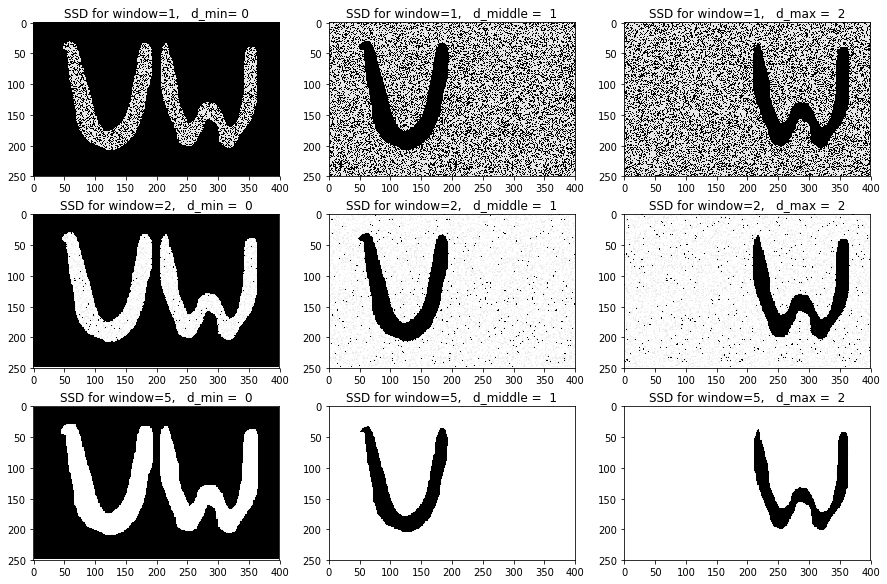

In [44]:
SSD1 = np.zeros(np.shape(SD))
SSD2 = np.zeros(np.shape(SD))
SSD5 = np.zeros(np.shape(SD))

#a = np.array([[1,2,2,3,4],
#              [0,1,2,3,3],
#              [0,1,2,2,2],
#              [1,1,1,2,3],
#              [3,4,3,5,4]])
#print(a)
#print(windSum(a,2))

for Delta in range(1+d_max-d_min):
    SSD1[Delta] = windSum(SD[Delta],1)
    SSD2[Delta] = windSum(SD[Delta],2)
    SSD5[Delta] = windSum(SD[Delta],5)
    
#print(SSD1)
#print(SSD2)
#print(SSD5)
    
d_middle = round((d_min+d_max)/2)
        
fig = plt.figure(figsize = (15, 10))
plt.subplot(331)
plt.title('SSD for window=1,   d_min={:>2d}'.format(d_min))
plt.imshow(1+SSD1[0], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(332) 
plt.title('SSD for window=1,   d_middle = {:>2d}'.format(d_middle))
plt.imshow(1+SSD1[d_middle-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(333)
plt.title('SSD for window=1,   d_max = {:>2d}'.format(d_max))
plt.imshow(1+SSD1[d_max-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(334)
plt.title('SSD for window=2,   d_min = {:>2d}'.format(d_min))
plt.imshow(1+SSD2[0], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(335) 
plt.title('SSD for window=2,   d_middle = {:>2d}'.format(d_middle))
plt.imshow(1+SSD2[d_middle-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(336)
plt.title('SSD for window=2,   d_max = {:>2d}'.format(d_max))
plt.imshow(1+SSD2[d_max-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(337)
plt.title('SSD for window=5,   d_min = {:>2d}'.format(d_min))
plt.imshow(1+SSD5[0], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(338) 
plt.title('SSD for window=5,   d_middle = {:>2d}'.format(d_middle))
plt.imshow(1+SSD5[d_middle-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(339)
plt.title('SSD for window=5,   d_max = {:>2d}'.format(d_max))
plt.imshow(1+SSD5[d_max-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))

### Problem 5: write code for function computing "disparity map" from SSD arrays (as above) for each disparity in the range specified by integers $d_{min}$, $d_{max}$. It should return a disparity map (image). At each pixel, disparity map image should have disparity value corresponding to the minimum SSD at this pixel. For pixels at the margins, the disparity map should be set to zero. HINT: margin pixels are characterized by $INFTY$ values of $SSD$.

In [45]:
# You should use functions np.where (pointwise "if, then, else" operation) and np.minimum (pointwise "minimum" operation)
# These functions will help to avoid double loops for traversing the pixels.
# WARNING: there will be a deducton for double-loops traversing pixels, but single loop to traverse disparities is OK.

def SSDtoDmap(SSD_array, d_minimum, d_maximum):
    
    # Initialize the dMap to be the disparity 0 (matched with the first SSD to compare with)
    dMap = np.full(np.shape(SD[0]),d_minimum)
    
    # the previous SSD to compare with
    Pre_SSD = SSD_array[0]

    # compare with each eisparity level
    for d in range(1,1+d_maximum-d_minimum):
        # SSD with the disparity d
        current_SSD = SSD_array[d]
        # update dMap to be equal d for a specific pixel if the SSD in that particular pixel is smaller
        dMap = np.where(current_SSD < Pre_SSD,d,dMap)
    
    # set INFTY to 0
    #dMap = np.where(((dMap==INFTY) or (dMap==-INFTY)),0,dMap)
        
    return dMap

### Compute and show disparity map (fully implemented)

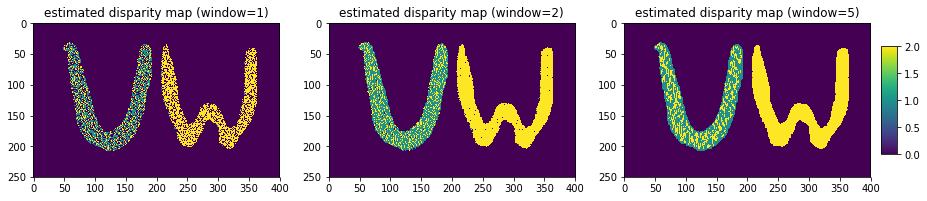

In [46]:
dMap1 = SSDtoDmap(SSD1,d_min,d_max)
dMap2 = SSDtoDmap(SSD2,d_min,d_max)
dMap5 = SSDtoDmap(SSD5,d_min,d_max)

fig = plt.figure(figsize = (15, 3))
plt.subplot(131)
plt.title("estimated disparity map (window=1)")
plt.imshow(dMap1, vmin = 0, vmax = d_max)
plt.subplot(132)
plt.title("estimated disparity map (window=2)")
plt.imshow(dMap2, vmin = 0, vmax = d_max)
plt.subplot(133)
plt.title("estimated disparity map (window=5)")
plt.imshow(dMap5, vmin = 0, vmax = d_max)
plt.colorbar(cax=plt.axes([0.91, 0.25, 0.015, 0.5]))

### Problem 6: test your code on a real stereo pair with ground truth (Tsukuba)

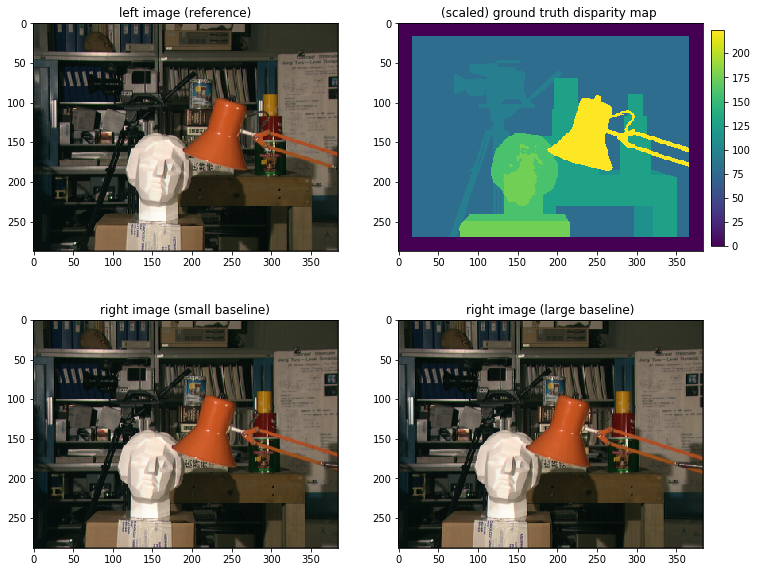

In [47]:
# images/tsukuba subdirectory contains (a subset of) "Tsukuba" stereo images that are probably 
# the oldest stereo data with dense ground-truth produced at the University of Tsukuba in 2001. 
# The full Tsukuba dataset and many other stereo images with ground-truth disparity maps can be
# downloaded from well-known Middlebury repository  http://vision.middlebury.edu/stereo/
im_left = image.imread("images/stereo_pairs/tsukuba/scene1.row3.col3.ppm")
im_gt = image.imread("images/stereo_pairs/tsukuba/truedisp.row3.col3.pgm")
im_right = image.imread("images/stereo_pairs/tsukuba/scene1.row3.col4.ppm")
im_right2 = image.imread("images/stereo_pairs/tsukuba/scene1.row3.col5.ppm")

fig = plt.figure(figsize = (12, 10))
plt.subplot(221)
plt.title("left image (reference)")
plt.imshow(im_left)
plt.subplot(222) 
plt.title("(scaled) ground truth disparity map ")
plt.imshow(im_gt)
plt.colorbar(cax=plt.axes([0.91, 0.557, 0.015, 0.3]))
plt.subplot(223)
plt.title("right image (small baseline)")
plt.imshow(im_right)
plt.subplot(224)
plt.title("right image (large baseline)")
plt.imshow(im_right2)

### Note that the integer-valued ground truth image above represents scaled disparity values for the pixels in the reference (left) mage. The scale w.r.t. the small baseline right image ($\text{im_right}$) is 16, while the scale for the large baseline right image ($\text{im_right2}$) is 8. Below, you should use the small-baseline right image ($\text{im_right}$). 

### Problem 6a: Using ground truth disparity map, estimate the range of disparity values between pixels in the left image ($\text{im_left}$) and the right image ($\text{im_right}$) .

In [48]:
# Solution: use standard functions to find min and max values in the ground truth disparity map. 
# You should ignore 0-valued margin!

d_min = 0 # change me
d_max = 14 # change me

### Compute squared differences using $\text{SD_array}$ function and visualize the results using logarithmic scale. Note that linear scale would make it hard to see smaller squared differences since there are many very large ones. (fully implemented)

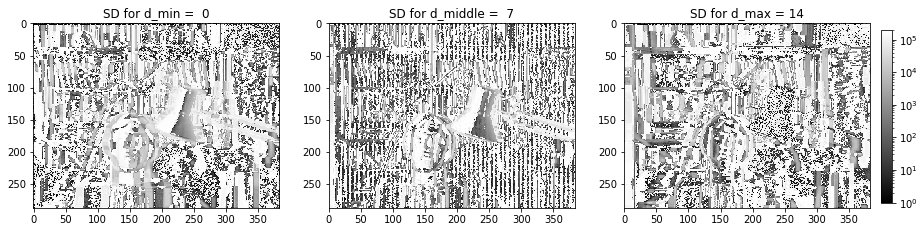

In [49]:
SD = SD_array(im_left, im_right, d_min, d_max)    
    
fig = plt.figure(figsize = (15, 4))
plt.subplot(131)
plt.title('SD for d_min = {:>2d}'.format(d_min))
plt.imshow(im_left)
plt.imshow(1+SD[0], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(132) 
d_middle = round((d_min+d_max)/2)
plt.title('SD for d_middle = {:>2d}'.format(d_middle))
plt.imshow(1+SD[d_middle-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(133)
plt.title('SD for d_max = {:>2d}'.format(d_max))
plt.imshow(1+SD[d_max-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.colorbar(cax=plt.axes([0.91, 0.2, 0.01, 0.6]))

### Problem 6b: Explain the differences you observe above:

answer:

For d_min=0, we observed that the background, object in distance, are darker. This is becuase object further away have a samller disparity so the small disparity is close to the true disparity and produce a small square difference. For d_middle = 7, we observed that the object in some distance, such as the face, is darker because they have the true disparity close to the d_middle which lead to small square diffeence for that region. Lastly, for d_max=14, we observed that the front object such as the ligh/stand is darker compare to the same region in the other two image because they have a large disparity. Thus, d_max will results in damller square differnce for those region. 

### Problem 6c: Write function $\text{Dmap_Windows}$ that returns disparith map from a given stereo pair (left and right image), specified disparity range, and window size. Your implementation should combine functions implemented and debugged earlier ($\text{SD_array}$, $\text{windSum}$, and $\text{SSDtoDmap}$).

In [50]:
def Dmap_Windows(imageL, imageR, d_minimum, d_maximum, window_width):
    
    SD = SD_array(imageL, imageR, d_minimum, d_maximum) 
    
    SSD = np.zeros(np.shape(SD))

    for Delta in range(1+d_maximum-d_minimum):
        SSD[Delta] = windSum(SD[Delta],window_width)

    dMap = SSDtoDmap(SSD,d_minimum,d_maximum)
    
    return dMap

### Compute and show disparity maps for Tsukuba using small and large windows. (fully implemented)

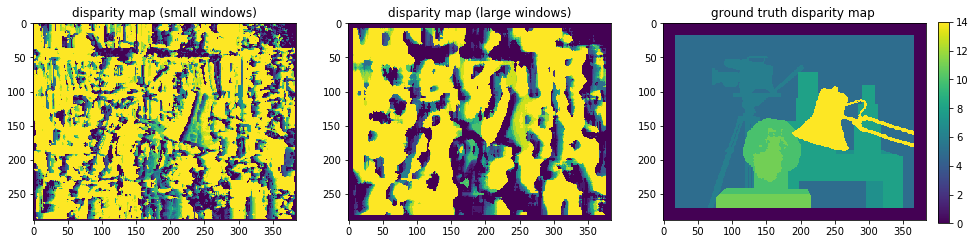

In [51]:
dispMap_small = Dmap_Windows(im_left, im_right, d_min, d_max, 4)
dispMap_large = Dmap_Windows(im_left, im_right, d_min, d_max, 15)

fig = plt.figure(figsize = (16, 7))
plt.subplot(131)
plt.title("disparity map (small windows)")
plt.imshow(dispMap_small, vmin = 0, vmax = d_max)
plt.subplot(132)
plt.title("disparity map (large windows)")
plt.imshow(dispMap_large, vmin = 0, vmax = d_max)
plt.subplot(133) 
plt.title("ground truth disparity map ")
plt.imshow(im_gt/16, vmin = 0, vmax = d_max)
plt.colorbar(cax=plt.axes([0.91, 0.3, 0.01, 0.4]))